<a href="https://colab.research.google.com/github/yarathamed/Face-Recognition-System/blob/main/Copy_of_assignment1_Pattern_lda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from PIL import Image
# import  matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from skimage import color
from skimage import io
import cv2
from sklearn.model_selection import train_test_split
# plt.show()
# import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
datapath = 'drive/MyDrive/assignment1_pattern/faces/s1/2.pgm'
try:
  img=Image.open(datapath)
# img=cv2.imread(datapath)
  plt.imshow(img)
  print(np.asarray(img).shape)
except IOError:
  pass  
# plt.show()

##Convert every image into a vector of 10304 values

In [ ]:
def conv_img_to_vec(path):  
  img  = Image.open(path)
  # img=cv2.imread(path) 
  # plt.imshow(img)
  img_vec=np.array(img).flatten()
  return img_vec 
  # print(img_vect)
  # print(len(img_vect))
  # w,h=img.size
  # print(w,h)

## Generating Data Matrix and label vector

In [ ]:
# def preprocess(dataset_dir = "drive/MyDrive/assignment1_pattern/faces"):
dataset_dir = "drive/MyDrive/assignment1_pattern/faces"
D = np.empty((0, 10304))#, int
y=[]
  # train_set = []
  # train_set_number = []
  # test_set = []
  # test_set_number = []
for i in range(40):
    label = i+1
    for j in range(10):
        # if j < 6 :
            path = dataset_dir + '/s'+str(label)+'/'+str(j+1)+'.pgm'
            img = conv_img_to_vec(path).astype(np.int64)
            D=np.append(D,np.array([img]),axis=0) 
            # D.append(img)
            y.append(label)
        # else : 
            # path = dataset_dir + '/s'+str(person_id)+'/'+str(j+1)+'.pgm'
            # img = img_to_vector(path).astype(np.int64)
            # test_set.append(img)
            # test_set_number.append(person_id)
    
# D = np.array(D.reshape(400,10304))
# y = np.array(y.reshape(400,10304))
# test_set = np.array(test_set)
# test_set_number = np.array(test_set_number)
# print(np.size(D))
print("Dimensions of D =",D.shape)
# print(D.shape[1])
print("Length of y =",len(y))
  # return D,y
    # train_set.T, train_set_number, test_set.T, test_set_number

Dimensions of D = (400, 10304)
Length of y = 400


## Splitting the data into train and test data (50% each)

In [ ]:
X_train = D[1:400:2,:]
X_test = D[0:400:2,:]
y_train = y[1:400:2]
y_test = y[0:400:2]

from collections import Counter

print("train dataset: ",Counter(y_train))
print('test dataset: ',Counter(y_test))

print(X_train)
print(X_train.shape)
print(X_train.T.shape)
print(X_test)
print(X_test.shape)


# from sklearn.model_selection import train_test_split
# X_train2, X_test2, y_train2, y_test2 = train_test_split( D, y, test_size=0.5, random_state=42)
# print("train dataset: ",Counter(y_train))
# print('test dataset: ',Counter(y_test))

# print(X_train)
# print(X_test)

train dataset:  Counter({1: 5, 2: 5, 3: 5, 4: 5, 5: 5, 6: 5, 7: 5, 8: 5, 9: 5, 10: 5, 11: 5, 12: 5, 13: 5, 14: 5, 15: 5, 16: 5, 17: 5, 18: 5, 19: 5, 20: 5, 21: 5, 22: 5, 23: 5, 24: 5, 25: 5, 26: 5, 27: 5, 28: 5, 29: 5, 30: 5, 31: 5, 32: 5, 33: 5, 34: 5, 35: 5, 36: 5, 37: 5, 38: 5, 39: 5, 40: 5})
test dataset:  Counter({1: 5, 2: 5, 3: 5, 4: 5, 5: 5, 6: 5, 7: 5, 8: 5, 9: 5, 10: 5, 11: 5, 12: 5, 13: 5, 14: 5, 15: 5, 16: 5, 17: 5, 18: 5, 19: 5, 20: 5, 21: 5, 22: 5, 23: 5, 24: 5, 25: 5, 26: 5, 27: 5, 28: 5, 29: 5, 30: 5, 31: 5, 32: 5, 33: 5, 34: 5, 35: 5, 36: 5, 37: 5, 38: 5, 39: 5, 40: 5})
[[ 60.  60.  62. ...  32.  34.  34.]
 [ 63.  53.  35. ...  41.  10.  24.]
 [ 43.  50.  41. ... 158. 153. 169.]
 ...
 [123. 121. 126. ...  40.  35.  42.]
 [125. 119. 124. ...  36.  39.  40.]
 [125. 124. 124. ...  36.  35.  34.]]
(200, 10304)
(10304, 200)
[[ 48.  49.  45. ...  47.  46.  46.]
 [ 39.  44.  53. ...  29.  26.  29.]
 [ 64.  76.  80. ...  35.  37.  39.]
 ...
 [128. 125. 125. ...  85.  90.  84.]


## LDA

In [ ]:
def lda(trainD, labels, k):
    # trainD = np.asarray(trainD)
    # labels = np.asarray(labels)

    n, d = trainD.shape
    #get number of classes
    classes = np.unique(labels)
    total_mean = trainD.mean(axis=0)
     #between class scatter matrix
    Sb = np.zeros((d,d),dtype=np.float32)
    #within class scatter matrix
    Sw = np.zeros((d,d),dtype=np.float32)

    for i in classes:
        #get subject class
        trainDi = trainD[np.where(labels==i)[0],:]
        #mean of the class
        # print("Calculating means")
        meani = trainDi.mean(axis=0)
        ni=traiwnDi.shape[0]
        # print("Calculating between class scatter matrix")
        Sb = Sb + ni * np.dot((meani - total_mean).T,(meani - total_mean))
        # print("Calculating within-class scatter matrix")
        Sw = Sw + np.dot((trainDi - meani).T,(trainDi - meani))
        
    eigen_values, eigen_vectors = np.linalg.eigh(np.dot(np.linalg.inv(Sw), Sb))
    #get indexes of descendigly sorted eigen values array
    idx = eigen_values.argsort()[::-1][:k]
    #get the corresponding k eigenvectors 
    eigen_vectors = np.array(eigen_vectors[:,idx].real,dtype= np.float32)
    
    return eigen_vectors.T


## Functions

In [ ]:
def KNN_lda(test_faces, test_labels, train_faces, train_labels): ## classifier tuning
    K=[1,3,5,7]
    acc=[]
    for k in K:
      knn = KNeighborsClassifier(n_neighbors=k)
      Nmodel=knn.fit(train_faces, train_labels)
      #get the prediction for each image in the test set
      y_pred_lda = Nmodel.predict(test_faces)
      #get the accuracy of the prediction
      acc.append(metrics.accuracy_score(test_labels, y_pred_lda))
      # accuracy = metrics.accuracy_score(test_labels, y_pred_lda)
    plotAccAgainstK_lda(K,acc)#accuracy * 100
    
def FirstNN(x,y,x_test): ##first nearest neighbor to determine class labels
  FNN_Model = KNeighborsClassifier(n_neighbors=1) 
  model=FNN_Model.fit(x,y)
  y_pred_lda=model.predict(x_test)
  return y_pred_lda

def plotAccAgainstK_lda(k,acc): ## plotting classification accuracy against value of k
  # vec=[39,53]
  # i=0
  plt.plot(k,acc)
  plt.xlabel("K")
  plt.ylabel("Accuracy")
  # plt.legend()  
        

dim of projected matrix =  (200, 39)
dim of projected matrix with 53 eigenvectors =  (200, 53)
accuracy of LDA:  94.5 %
accuracy of LDA with 53 eigenvectors:  94.5 %


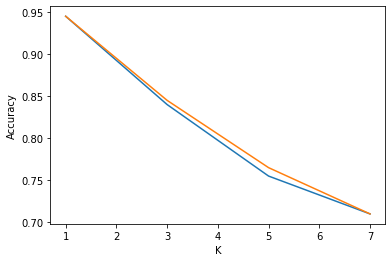

In [ ]:
W = lda(X_train, y_train, 39)
W_comp = lda(X_train, y_train, 53)
projectedTrain = np.dot(W,X_train.T).T
projectedTest =  np.dot(W,X_test.T).T
projectedTrain_comp = np.dot(W_comp,X_train.T).T
projectedTest_comp =  np.dot(W_comp,X_test.T).T
y_pred_lda=FirstNN(projectedTrain, y_train, projectedTest)
y_pred_lda_comp=FirstNN(projectedTrain_comp, y_train, projectedTest_comp)

accuracyLDA = metrics.accuracy_score(y_test,y_pred_lda) #, y_train,1)
accuracyLDA_comp = metrics.accuracy_score(y_test,y_pred_lda_comp)
KNN_lda(projectedTest, y_test, projectedTrain, y_train)
KNN_lda(projectedTest_comp, y_test, projectedTrain_comp, y_train)

# plotAccAgainstK_lda()
print("dim of projected matrix = ",projectedTrain.shape)
print("dim of projected matrix with 53 eigenvectors = ",projectedTrain_comp.shape)
print("accuracy of LDA: ", accuracyLDA*100,"%")
print("accuracy of LDA with 53 eigenvectors: ", accuracyLDA_comp*100,"%")

In [ ]:
print(W)

[[-4.9444795e-02  5.7214007e-02 -6.9105007e-02 ...  4.9113519e-03
   2.3997037e-02  3.8225057e-03]
 [ 1.7345846e-02  1.7977111e-03 -4.3715142e-02 ...  2.5329391e-02
   3.3073355e-02  3.5888117e-03]
 [ 1.8682603e-02  7.1816295e-02  1.3398944e-02 ... -2.1090366e-02
  -2.4527131e-02  1.0937911e-03]
 ...
 [ 1.9702207e-02  6.8919219e-02  7.8772949e-03 ... -1.8340135e-04
   1.4216493e-02  2.8151574e-03]
 [-2.9169360e-01  3.7563860e-02 -5.3103860e-02 ... -5.9063653e-03
  -1.2209202e-02  4.0995735e-03]
 [-2.9169360e-01  3.7563860e-02 -5.3103860e-02 ... -5.9063653e-03
  -1.2209202e-02  4.0995735e-03]]


In [ ]:
D2 = D
labels_D2=[0]*400
print(D2)
print(labels_D2)

[[ 48.  49.  45. ...  47.  46.  46.]
 [ 60.  60.  62. ...  32.  34.  34.]
 [ 39.  44.  53. ...  29.  26.  29.]
 ...
 [125. 119. 124. ...  36.  39.  40.]
 [119. 120. 120. ...  89.  94.  85.]
 [125. 124. 124. ...  36.  35.  34.]]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
# def unison_shuffled_copies(a, b):
#     assert len(a) == len(b)
#     p = np.random.permutation(len(a))
#     return a[p], b[p]

dim of X_trainNF =  (250, 10304)
Number of dominant eigenvectors =  39
dim of projected matrix =  (200, 39)
accuracy of LDA:  100.0 %
dim of X_trainNF =  (350, 10304)
Number of dominant eigenvectors =  39
dim of projected matrix =  (200, 39)
accuracy of LDA:  100.0 %
dim of X_trainNF =  (450, 10304)
Number of dominant eigenvectors =  39
dim of projected matrix =  (200, 39)
accuracy of LDA:  100.0 %


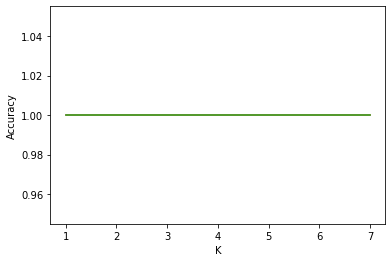

In [ ]:
step = [1, 3, 5]
accuracies=[]
#print(step[-2])
for j in range(len(step)):
 if step[j]!=1:
  del labels_D2[400:]
  D2 = D2.tolist()
  del D2[400:]
 D2 = np.array(D2)
 for i in range(1, (step[j]*100)+1): 
  labels_D2.append(1) 
  path_ni = "drive/MyDrive/assignment1_pattern/nonfaces2/pic ("+str(i)+").jpg"
  img = io.imread(path_ni)
  imgGray = color.rgb2gray(img)
  imgGray_resized = cv2.resize(imgGray, (92,112))
  img_nf = np.array(imgGray_resized).flatten()
  D2=np.append(D2,np.array([img_nf]),axis=0)

#  np.random.shuffle(D2)#[400:])
#  D2_shuff,labels_D2_shuff=unison_shuffled_copies(D2,np.asarray(labels_D2))
 X_trainNF = D2[1:400+step[j]*100:2,:]
 X_testNF = D2[0:400+step[j]*100:2,:]
 y_trainNF = labels_D2[1:400+step[j]*100:2]
 y_testNF = labels_D2[0:400+step[j]*100:2]
 print("dim of X_trainNF = ",X_trainNF.shape)
 
 W = lda(X_trainNF, y_trainNF, 39)
 projectedTrainNF = np.dot(W,X_trainNF.T).T
 projectedTestNF =  np.dot(W,X_testNF.T).T
 y_pred_lda=FirstNN(projectedTrainNF, y_trainNF, projectedTestNF)
 accuracyLDA = metrics.accuracy_score(y_testNF,y_pred_lda)
 KNN_lda(projectedTestNF, y_testNF, projectedTrainNF, y_trainNF)
 print("Number of dominant eigenvectors = ",W.shape[0])
 print("dim of projected matrix = ",projectedTrain.shape)
 print("accuracy of LDA: ", accuracyLDA*100,"%")
 accuracies.append(accuracyLDA)






In [ ]:
print(W.shape)

(10304, 10304)


Text(0, 0.5, 'Accuracy')

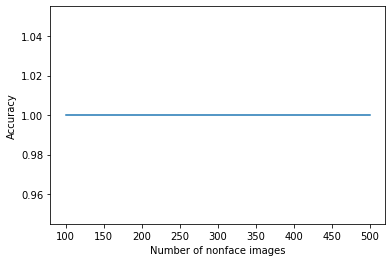

In [ ]:
plt.plot([100,300,500],accuracies)
plt.xlabel("Number of nonface images")
plt.ylabel("Accuracy")

In [ ]:
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(D, y, test_size=0.3, random_state=42,stratify=y)
print("train dataset: ",Counter(y_train_70))
print('test dataset: ',Counter(y_test_30))

train dataset:  Counter({16: 7, 4: 7, 11: 7, 12: 7, 27: 7, 25: 7, 2: 7, 19: 7, 20: 7, 13: 7, 6: 7, 36: 7, 31: 7, 8: 7, 5: 7, 28: 7, 1: 7, 30: 7, 38: 7, 7: 7, 9: 7, 35: 7, 23: 7, 32: 7, 39: 7, 26: 7, 29: 7, 24: 7, 21: 7, 10: 7, 3: 7, 37: 7, 40: 7, 17: 7, 34: 7, 14: 7, 15: 7, 33: 7, 18: 7, 22: 7})
test dataset:  Counter({31: 3, 19: 3, 17: 3, 10: 3, 18: 3, 25: 3, 38: 3, 37: 3, 1: 3, 36: 3, 26: 3, 39: 3, 23: 3, 27: 3, 15: 3, 8: 3, 33: 3, 35: 3, 22: 3, 9: 3, 12: 3, 28: 3, 34: 3, 16: 3, 4: 3, 29: 3, 30: 3, 5: 3, 14: 3, 20: 3, 6: 3, 7: 3, 32: 3, 11: 3, 2: 3, 21: 3, 24: 3, 40: 3, 13: 3, 3: 3})


No handles with labels found to put in legend.


dim of projected matrix =  (280, 39)
accuracy of LDA:  94.16666666666667 %


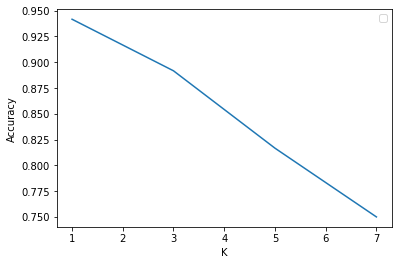

In [ ]:
W = lda(X_train_70, y_train_70, 39)
projectedTrain_70 = np.dot(W,X_train_70.T).T
projectedTest_30 =  np.dot(W,X_test_30.T).T
y_pred_lda2=FirstNN(projectedTrain_70, y_train_70, projectedTest_30)
accuracyLDA2 = metrics.accuracy_score(y_test_30,y_pred_lda2)
KNN_lda(projectedTest_30, y_test_30, projectedTrain_70, y_train_70)
print("dim of projected matrix = ",projectedTrain_70.shape)
print("accuracy of LDA: ", accuracyLDA2*100,"%")

In [ ]:
# a=np.array([1,2,3,4])
# b=np.array([7,3,0,8])
# print(unison_shuffled_copies(a,b))

(array([4, 1, 3, 2]), array([8, 7, 0, 3]))
